In [7]:
# Montamos nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Seleccionamos la carpeta y verificamos los contenidos
%cd "/content/drive/MyDrive/TC3002B-IA"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TC3002B-IA
model


In [8]:
# Importamos las bibliotecas de preprocesado de datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

# Directorios de trabajo
base_dir = 'model'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

Found 963 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
(8, 64, 64, 3)
[1. 1. 1. 0. 0. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

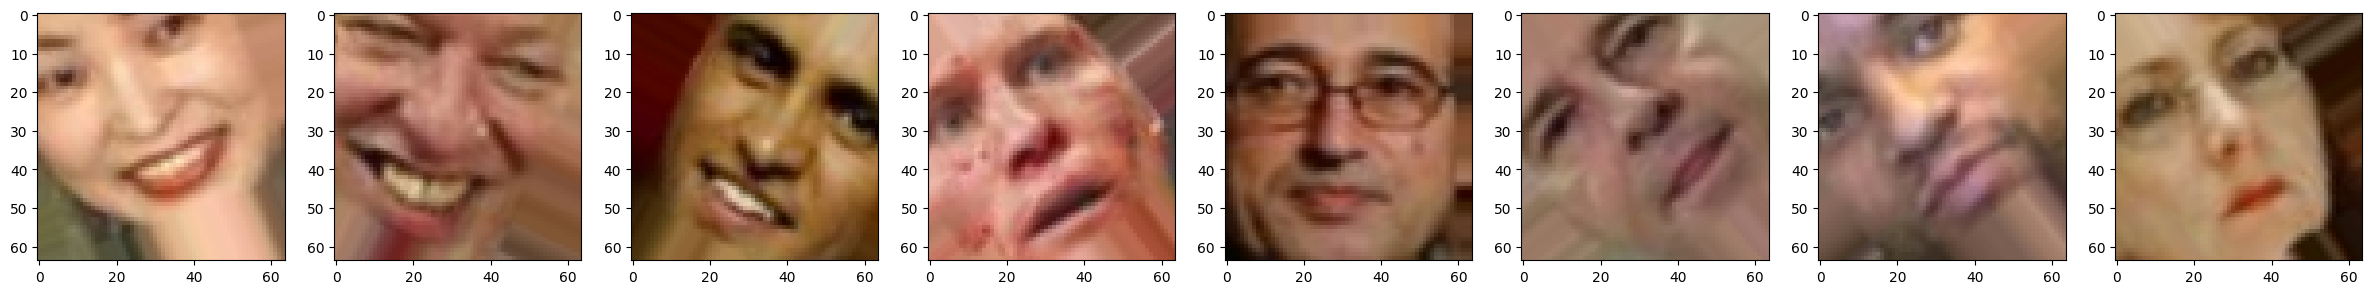

In [46]:
# Data augmentation
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						  width_shift_range = 0.15,
						  height_shift_range = 0.15,
						  shear_range = 0.2,
							zoom_range = 0.05,
							horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (64, 64),
							batch_size = 8,
							class_mode ='binary',
							)

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (64, 64),
					batch_size = 20,
					class_mode= 'binary')

val_datagen = ImageDataGenerator(1./255)
val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (64,64),
							batch_size = 20,
							class_mode= 'binary')

# Muestra la augmentation
images , labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 32, 32, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 10)        910       
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 16, 16, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_24 (Flatten)        (None, 2560)              0         
                                                                 
 dense_68 (Dense)            (None, 64)              

Epoch 1/15
121/121 [==============================] - 9s 70ms/step - loss: 0.6931 - acc: 0.5265
Epoch 2/15
121/121 [==============================] - 8s 67ms/step - loss: 0.6763 - acc: 0.5909
Epoch 3/15
121/121 [==============================] - 7s 58ms/step - loss: 0.6291 - acc: 0.6656
Epoch 4/15
121/121 [==============================] - 8s 64ms/step - loss: 0.5565 - acc: 0.7165
Epoch 5/15
121/121 [==============================] - 9s 70ms/step - loss: 0.5243 - acc: 0.7425
Epoch 6/15
121/121 [==============================] - 7s 60ms/step - loss: 0.5167 - acc: 0.7871
Epoch 7/15
121/121 [==============================] - 9s 71ms/step - loss: 0.4787 - acc: 0.7767
Epoch 8/15
121/121 [==============================] - 7s 58ms/step - loss: 0.4696 - acc: 0.7944
Epoch 9/15
121/121 [==============================] - 10s 83ms/step - loss: 0.4422 - acc: 0.8224
Epoch 10/15
121/121 [==============================] - 8s 68ms/step - loss: 0.4212 - acc: 0.8017
Epoch 11/15
121/121 [=================

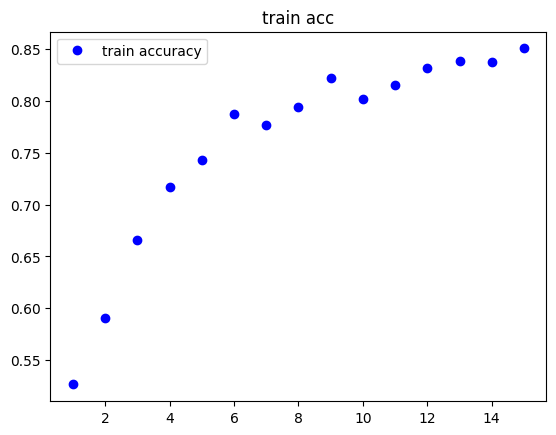

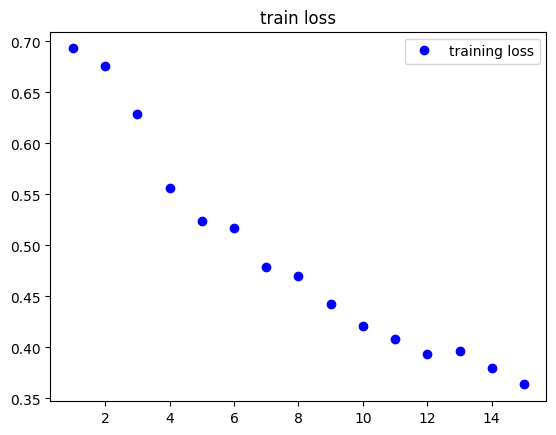

In [56]:
# Creación del modelo
model = models.Sequential()
model.add(layers.Conv2D(10, kernel_size=3, padding='same', activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(10, kernel_size=3, padding='same', activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(
					train_generator,
					epochs = 15)

acc = history.history['acc']
loss = history.history['loss']

model.save('smile_no_smile_v1.h5')

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [63]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate_generator(test_generator)
print('\ntest acc :\n', test_acc)

# Reporte de resultados
data = {
    'Model': ['V1'],
    'test loss': [test_loss],
    'test accuracy': [test_acc],
    'train loss' : [0.3637],
    'train accuracy' : [0.8505]
}

results = pd.DataFrame(data)

print(results)

<ipython-input-63-4bec1d85cff2>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.5249999761581421
  Model   test loss  test accuracy  train loss  train accuracy
0    V1  354.020691          0.525      0.3637          0.8505
